# Problem Statement

### Business problem overview

1. In the telecom industry, customers have many options to choose from and can easily switch from one provider to another. This competitive market has led to an average annual churn rate of 15-25% for the telecommunications industry. Since it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has become more important than customer acquisition.

2. For many incumbent operators, retaining high-profitable customers is the top business goal.

3. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyze customer-level data from a leading telecom firm to build predictive models to identify customers at high risk of churn and to identify the main indicators of churn.

# Objective
- To Predict the customers who are about to churn from a telecom operator
- We need to predict Churn on the basis of Action Period (Churn period data needs to be deleted after labelling)
  Churn would be based on Usage

# Key Steps Undertaken
#### Loading Libs :
- Loading necessary libraries
 - Data Processing.
 - Visualization.
 - Model Building.
 - Warnings Handling.

#### Data view at a glance :
- Data loading.
- Data dictionary.


#### Feature Engineering :
- Aggregating data by row to form new columns.
- Splitting data at 80/20.

#### Treating Missing Values :
- Visalizing missing values.
- Replacing missing values with simple constant imputation.
   
#### Exploratory Data Analysis & Handling Outliers:
- Perform Univarite analysis.
- Treating outliers detected under Univariate Analysis.
- Perform Bi-variate Analysis and Discover correlations.
 
#### Deducing Feature Importance :
- Using RandomForest deduce feature importance.
- Dimensionality Reduction using PCA.
- Visualize elements in lower dimension.

#### Model Building & Evaluation :
- Picking Logistic Regression for model building.
- Creating Pipeline for step to model building.
- Building the model.
- Model Evaluation

## <font color= green> Notebook Walkthrough (Hyperlinked):
[Loading Libraries](#libs)
#### 1. [Data view at a glance.](#data_view)
#### 2. [Feature Engineering.](#feature_engg)
#### 3. [Treating Missing Values.](#miss_val)
#### 4. [Exploratory Data Analysis & Handling Outliers.](#eda)
#### 5. [Deducing Feature Importance.](#feature_imp)
#### 6. [Model Building & Evaluation.](#model_build)

# Loading Libraries <a id='libs'></a>

In [1]:
#Data Handling
import pandas as pd
import numpy as np
import re
import os

#Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Model Building
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score


#Handling Warnings (commonly found in deprecated libs)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv("./telecom-churn-case-study-hackathon-cc50/train.csv")
unseen = pd.read_csv("./telecom-churn-case-study-hackathon-cc50/test.csv")
sample = pd.read_csv("./telecom-churn-case-study-hackathon-cc50/sample.csv")
data_dict = pd.read_csv("./telecom-churn-case-study-hackathon-cc50/data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


# 1. Data view at a glance <a id='data_view'></a>

In [3]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


The data dictionary contains a list of abbreviations that provides us with all the information we need to understand what a specific feature or variable in the churn dataset represents:

> ARPU -> Average revenue per user + KPI for the month of July
>
> OFFNET ->  All kind of calls outside the operator T network.
>
>ROAM -> Indicates that customer is in roaming zone during the call
>
>SPL -> Special calls

In [4]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [5]:
data.describe(include="all")

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,69999,69600,69266,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,283.134365,278.185912,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,NaN,NaN,NaN,334.213918,344.366927,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,-2258.709000,-1289.715000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,93.581000,86.714000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,197.484000,191.588000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,370.791000,365.369500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000


# 2. Feature Engineering <a id='feature_engg'></a>

Aggregating data for each row with Sum, Averages

In [6]:
ids = ['id','circle_id']
total_amounts = [i for i in list(data.columns) if re.search('total.+amt',i)]
total_outgoing_minutes = [i for i in list(data.columns) if re.search('total.+og.+mou',i)]
offnetwork_minutes = [i for i in list(data.columns) if re.search('offnet',i)]
average_revenue_3g = [i for i in list(data.columns) if re.search('arpu.+3g',i)]
average_revenue_2g = [i for i in list(data.columns) if re.search('arpu.+2g',i)]
volume_3g = [i for i in list(data.columns) if re.search('vol.+3g',i)]
volume_2g = [i for i in list(data.columns) if re.search('vol.+2g',i)]
age_on_network = [i for i in list(data.columns) if re.search('aon',i)]

#Storing them in a single flat list
variables = [*ids, 
             *total_amounts, 
             *total_outgoing_minutes, 
             *offnetwork_minutes, 
             *average_revenue_3g, 
             *average_revenue_2g,
             *volume_3g,
             *volume_2g,
             *age_on_network, 
             'churn_probability']

data = data[variables].set_index('id')

In [7]:
data.head()

,circle_id,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,arpu_2g_7,arpu_2g_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon,churn_probability
id,,,,,,,,,,,,,,,,,,,,,
0,109,77,65,10,81.21,221.68,3.63,32.24,96.68,2.33,...,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.00,1958,0
1,109,0,145,50,0.00,30.73,31.66,0.00,25.99,30.89,...,122.08,NaN,0.0,3.96,0.0,0.0,352.91,0.00,710,0
2,109,70,120,0,56.49,99.36,0.00,53.99,82.05,0.00,...,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.00,882,0
3,109,160,240,130,76.03,95.98,53.84,68.76,78.48,50.23,...,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.00,982,0
4,109,290,136,122,63.26,42.94,15.76,56.99,38.11,9.63,...,35.12,0.0,0.0,0.00,0.0,390.8,308.89,213.47,647,0


### -------------------------------------------------------- Splitting Data--------------------------------------------------------

In [8]:
data['circle_id'].unique()

array([109])

In [9]:
X = data.drop(['circle_id'],1).iloc[:,:-1]
y = data.iloc[:,-1]

X.shape, y.shape

((69999, 22), (69999,))

Splitting train and test data to avoid any contamination of the test data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 22), (14000, 22), (55999,), (14000,))

In [11]:
X_train.head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,arpu_3g_6,...,arpu_2g_6,arpu_2g_7,arpu_2g_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon
id,,,,,,,,,,,,,,,,,,,,,
37477,230,0,0,251.84,0.00,0.00,199.94,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,326
48025,150,532,372,256.36,185.66,230.84,1.08,4.46,14.94,NaN,...,NaN,5.70,224.01,0.00,0.00,729.98,0.00,2006.06,700.05,1151
7919,207,157,260,247.48,309.39,389.48,138.81,245.66,356.88,0.00,...,0.0,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,2500
20849,0,363,90,0.00,343.51,51.48,NaN,98.66,35.41,NaN,...,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,3164
34242,235,0,825,492.34,52.29,990.83,422.96,62.63,896.96,0.01,...,0.0,52.87,212.00,1224.59,455.72,1963.79,8.09,220.67,4.17,350


# 3. Treating Missing data <a id='missing_val'></a>

<AxesSubplot:ylabel='id'>

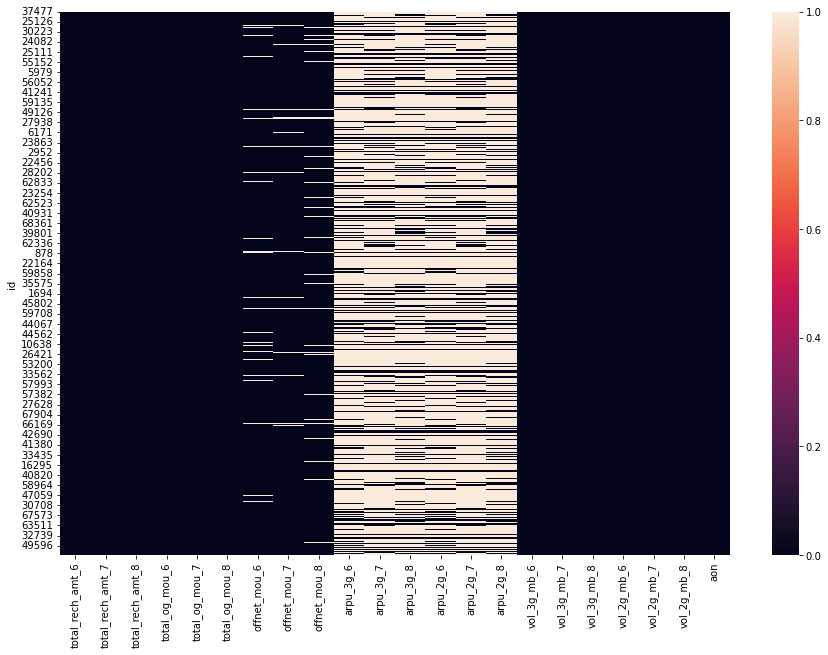

In [12]:
#Visualizing Missing data using Seaborn

plt.figure(figsize=(15,10))
sns.heatmap(X_train.isna())

In [13]:
#Missing value %
missing_data_percent = 100*X_train.isnull().sum()/len(y_train)
missing_data_percent

total_rech_amt_6     0.000000
total_rech_amt_7     0.000000
total_rech_amt_8     0.000000
total_og_mou_6       0.000000
total_og_mou_7       0.000000
total_og_mou_8       0.000000
offnet_mou_6         3.973285
offnet_mou_7         3.853640
offnet_mou_8         5.298309
arpu_3g_6           74.751335
arpu_3g_7           74.406686
arpu_3g_8           73.719174
arpu_2g_6           74.751335
arpu_2g_7           74.406686
arpu_2g_8           73.719174
vol_3g_mb_6          0.000000
vol_3g_mb_7          0.000000
vol_3g_mb_8          0.000000
vol_2g_mb_6          0.000000
vol_2g_mb_7          0.000000
vol_2g_mb_8          0.000000
aon                  0.000000
dtype: float64

`Columns with too many missing values are not very useful for predicting churn, so we drop them and keep only the columns that have less than 40% missing data.`

In [14]:
new_vars = missing_data_percent[missing_data_percent.le(40)].index
new_vars

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'aon'],
      dtype='object')

In [15]:
X_train_filtered = X_train[new_vars]
X_train_filtered.shape

(55999, 16)

`We will perform a simple imputation with constant values as zeros.`

In [16]:
missing_data_percent = X_train_filtered.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], dtype='object')

In [17]:
imp = SimpleImputer(strategy='constant', fill_value=0)
X_train_filtered[impute_cols] = imp.fit_transform(X_train_filtered[impute_cols])

<AxesSubplot:ylabel='id'>

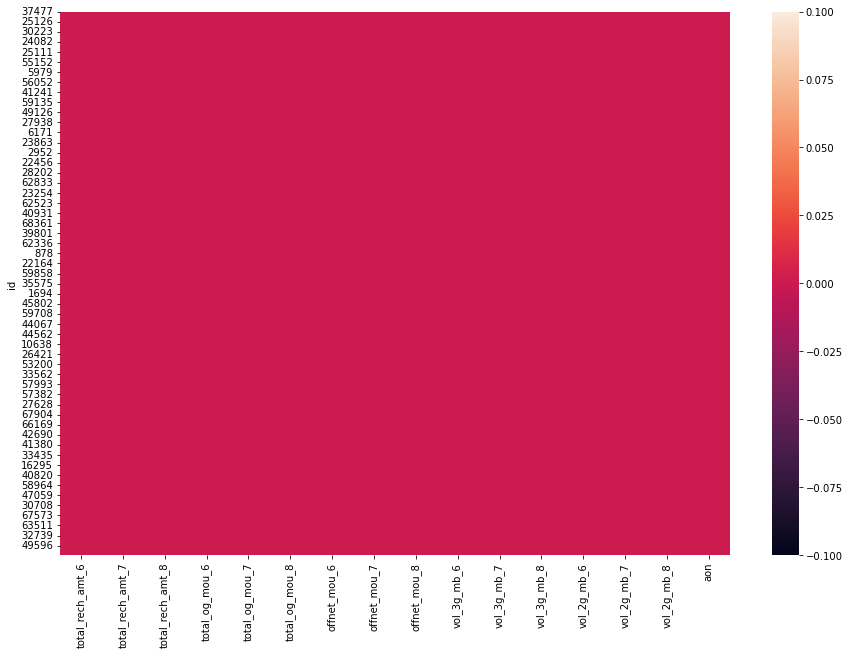

In [18]:
#Visualizing Missing data using Seaborn again
plt.figure(figsize=(15,10))
sns.heatmap(X_train_filtered.isna())

`Now the data has no missing values hence the imputation worked`

In [19]:
X_train_filtered.describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.00000,55999.000000,55999.000000,55999.000000,55999.000000,55999.00000,55999.000000,55999.000000,55999.000000,55999.000000
mean,328.837658,323.250094,324.360149,307.156598,311.304441,304.143342,191.97862,190.309172,186.347823,122.759663,129.690618,135.68441,52.476654,51.408794,50.229030,1218.776371
std,411.573353,419.325032,438.652507,468.779236,480.626876,476.732574,315.68877,319.163780,318.217921,558.861009,565.420570,583.18333,215.724053,213.119865,216.225914,951.216674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,180.000000
25%,110.000000,100.000000,92.000000,45.050000,42.830000,38.685000,28.99000,26.535000,23.740000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,468.000000
50%,230.000000,220.000000,225.000000,145.260000,141.040000,137.990000,89.89000,85.780000,83.110000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,867.000000
75%,436.000000,430.000000,435.000000,373.580000,382.620000,370.920000,224.85000,219.335000,217.370000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1809.000000
max,35190.000000,40335.000000,45320.000000,10674.030000,8285.640000,14043.060000,8362.36000,7043.980000,14007.340000,45735.400000,28144.120000,30036.06000,10285.900000,7873.550000,11117.610000,4337.000000


# 4. EDA <a id='eda'></a>

### --------------------------------------------------- Univariate Analysis--------------------------------------------------------

#### Using Boxplot to do a one view split check on data

<AxesSubplot:>

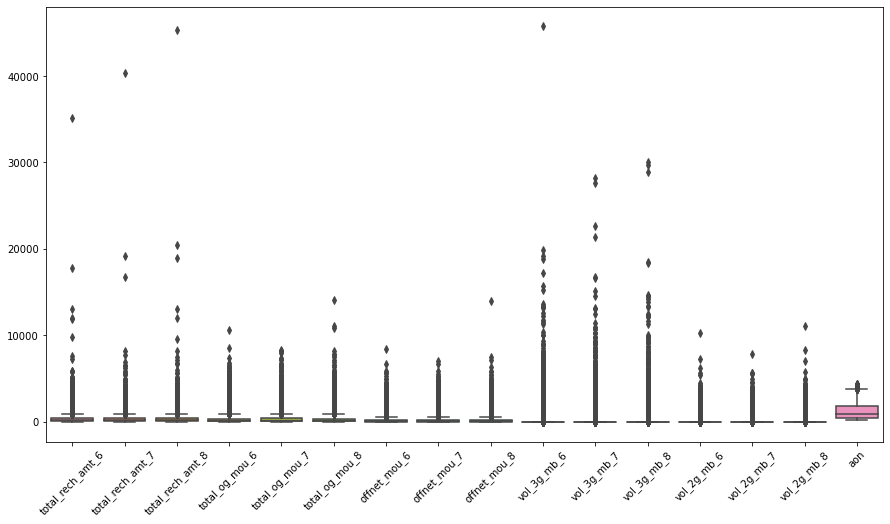

In [20]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_filtered)

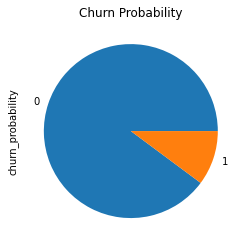

In [21]:
# lets find out churn/non churn percentage
((y_train.value_counts(normalize = True)*100)).plot(kind="pie")
plt.title('Churn Probability')
plt.show()

### 4.1 Handling outliers

The box plots of these features show there a lot of outliers. Applying <b>k-sigma</b> method for capping.

In [22]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

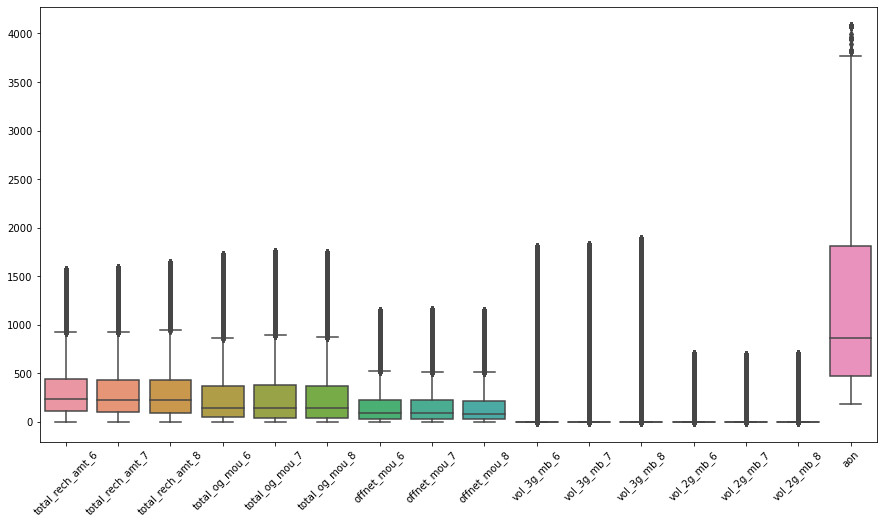

In [23]:
X_train_filtered1 = X_train_filtered.apply(cap_outliers, axis=0)
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_filtered1)
plt.show()

### 4.2 Scaling Features

In [24]:
scale = StandardScaler()
X_train_filtered2 = scale.fit_transform(X_train_filtered1)

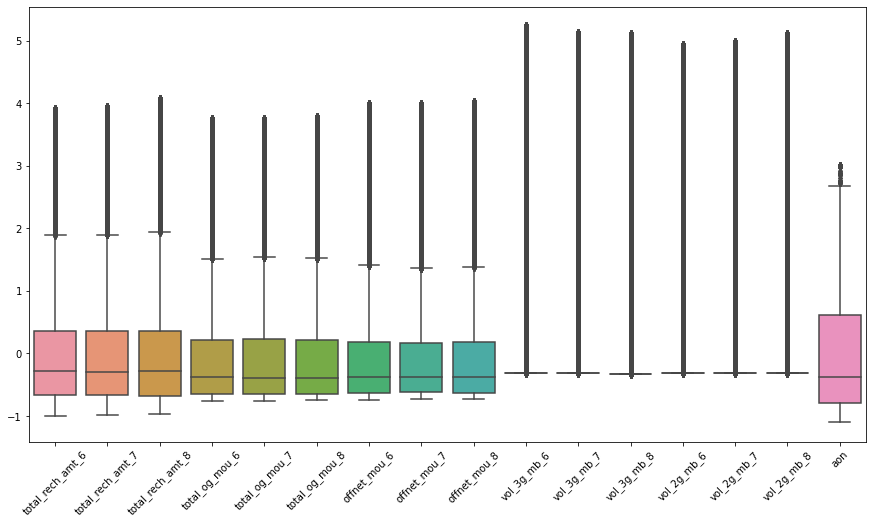

In [25]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = pd.DataFrame(X_train_filtered2, columns=new_vars))
plt.show()

### ---------------------------------------------------- Bivariate Analysis--------------------------------------------------------

In [26]:
#Creating a replicated data for visualization
data_cpy = data.copy()

In [27]:
# creating a new variable 'tenure'
data_cpy['tenure'] = (data_cpy['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
data_cpy.drop('aon',axis=1, inplace=True)

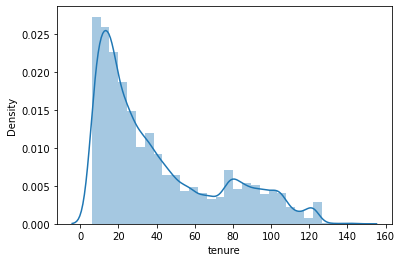

In [28]:
# Checking the distribution of he tenure variable

sns.distplot(data_cpy['tenure'],bins=30)
plt.show()

`Most of the Tenure is around 5-40 months`

#### Clustering Tenure to gather more visuals

In [29]:
tn_range = [1, 6, 12, 24, 60, 61]
tn_label = [ '1-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
data_cpy['tenure_range'] = pd.cut(data_cpy['tenure'], tn_range, labels=tn_label)
data_cpy['tenure_range'].head()

id
0        NaN
1    1-2 Yrs
2    2-5 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['1-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

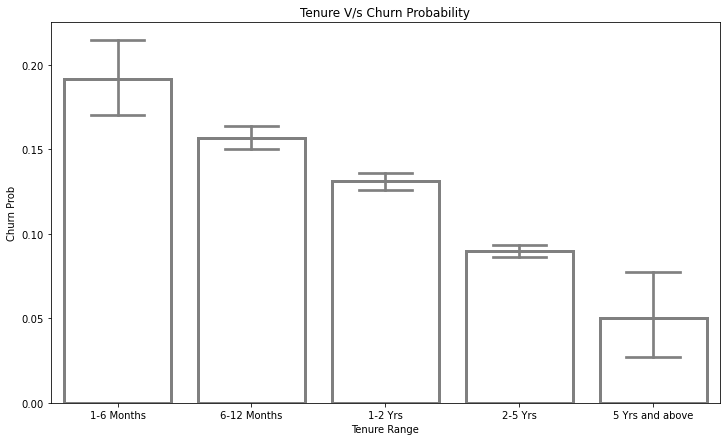

In [30]:
#Visualizing Tenure
plt.figure(figsize=[12,7])
sns.barplot(
    data=data_cpy, x="tenure_range", y="churn_probability",
    capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),
)
plt.xlabel('Tenure Range')
plt.ylabel('Churn Prob')
plt.title('Tenure V/s Churn Probability')
plt.show()

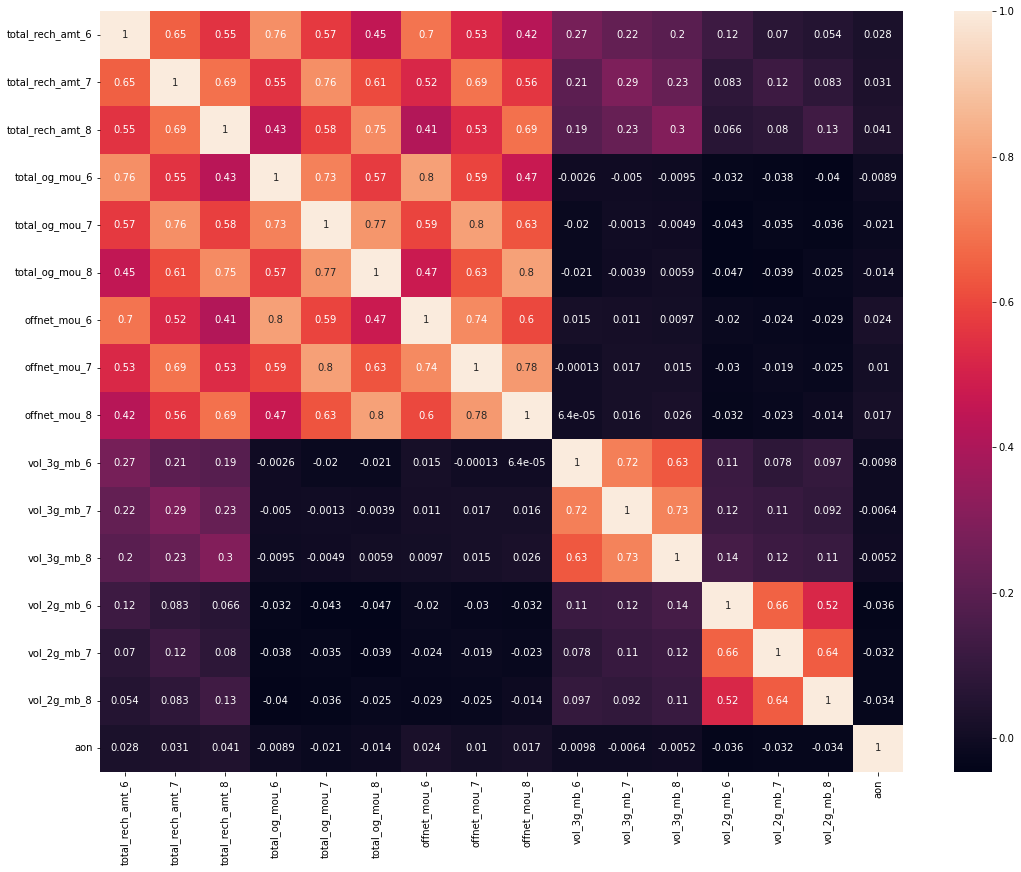

In [31]:
#Understanding Correlations within data
plt.figure(figsize=(18,14))
sns.heatmap(pd.DataFrame(X_train_filtered2, columns=new_vars).corr(),annot = True)
plt.show()

# 5. Deducing Feature Importance  <a id= feature_imp ></a>

Performing a random forest classification with 100 estimators for starters (100 being a random number)

In [32]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X_train_filtered2, y_train)

RandomForestClassifier(n_jobs=-1)

In [33]:
feature_importances = pd.DataFrame({'col':new_vars, 'importance':rf.feature_importances_})

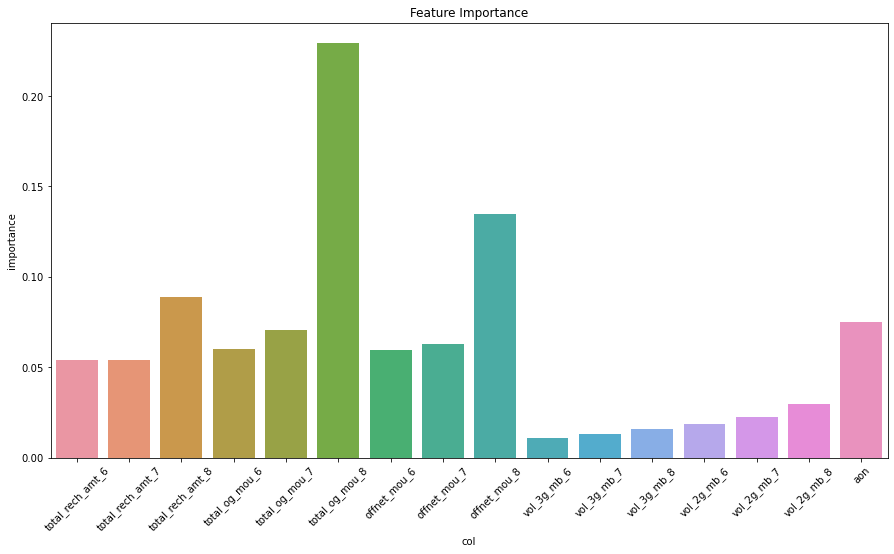

In [34]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.barplot(feature_importances['col'], feature_importances['importance'])
plt.title('Feature Importance')
plt.show()

`Projecting them into a lower dimensional space using PCA.`

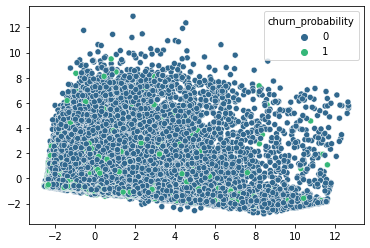

In [35]:
pca = PCA()
pca_components = pca.fit_transform(X_train_filtered2)
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train, palette= 'viridis')
plt.show()

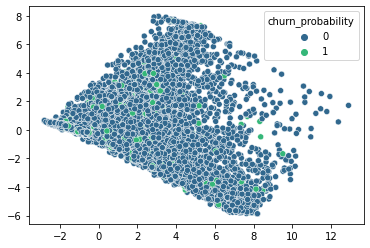

In [36]:
sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train, palette= 'viridis')
plt.show()

Understand which of the components have high feature importance.

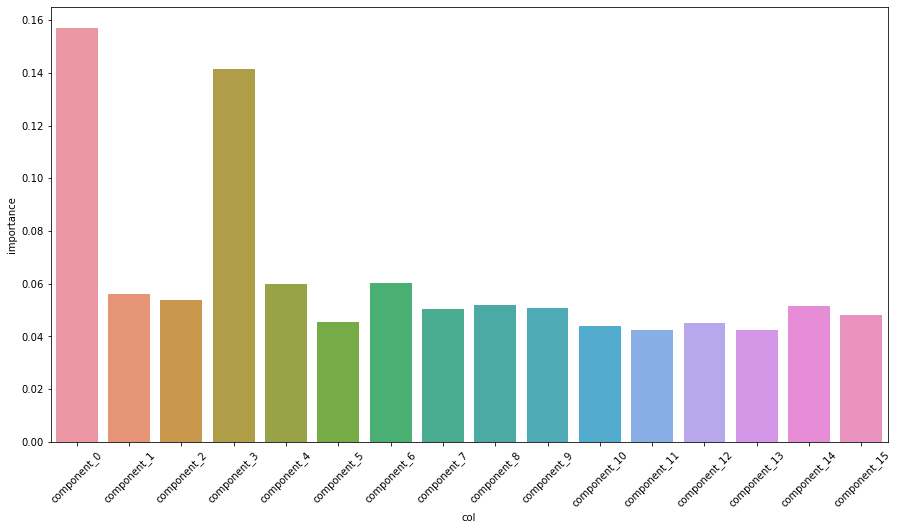

In [37]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(pca_components, y_train)

feature_importances = pd.DataFrame({'col':['component_'+str(i) for i in range(16)], 
                                    'importance':rf.feature_importances_})

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.barplot(feature_importances['col'], feature_importances['importance'])
plt.show()

# 6. Model building <a id='model_build'></a>

Logistic model is a good starting point

In [38]:
lr = LogisticRegression(max_iter=1000, tol=0.001, solver='sag')
lr.fit(pca_components[:,:2], y_train)

LogisticRegression(max_iter=1000, solver='sag', tol=0.001)

In [39]:
lr.score(pca_components[:,:2], y_train)

0.8983374703119699

`Build a pipeline to fit and score the model faster.`

In [40]:
imp = SimpleImputer(strategy='constant', fill_value=0)
scale = StandardScaler()
pca = PCA(n_components=10)
lr = LogisticRegression(max_iter=1000, tol=0.001)

In [41]:
pipe = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca),
                         ('model',lr)])

In [42]:
pipe.fit(X_train[new_vars], y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()), ('pca', PCA(n_components=10)),
                ('model', LogisticRegression(max_iter=1000, tol=0.001))])

In [43]:
train_score = pipe.score(X_train[new_vars], y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.9008375149556243


In [44]:
test_score = pipe.score(X_test[new_vars], y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.8980714285714285


### Model Evaluation

In [45]:
confusion_matrix(y_train, pipe.predict(X_train[new_vars]))

array([[50017,   289],
       [ 5264,   429]])

In [46]:
confusion_matrix(y_test, pipe.predict(X_test[new_vars]))

array([[12485,    76],
       [ 1351,    88]])

Since there are class imbalance, high amount of type 2 error exists

In [47]:
precision_score(y_test, pipe.predict(X_test[new_vars]))

0.5365853658536586

In [48]:
recall_score(y_test, pipe.predict(X_test[new_vars]))

0.061153578874218205

## Conclusion :

Logistic regression with PCA was observed to be the best model for predicting churn, based on the accuracy performance measure.

Outgoing calls (with local same operator mobile/other operator mobile/fixed lines, STD or Special) play a vital role in understanding the possibility of churn. Therefore, the operator should focus on outgoing calls data and provide some kind of special offers to customers whose outgoing calls are decreasing.

### --------------------------------------------------- End of Analysis--------------------------------------------------------

### Creating submission file (For Kaggle)

In [49]:
sample.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


The submission file should contain churn_probability values that have to be predicted for the unseen data provided (test.csv)

#### Moving to test.csv file

In [50]:
unseen.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [51]:
submission_data = unseen.set_index('id')[new_vars]
submission_data.shape

(30000, 16)

Creating a new column in the unseen dataset called churn_probability and use the model pipeline to predict the probabilities for this data

In [52]:
unseen['churn_probability'] = pipe.predict(submission_data)
output = unseen[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [53]:
output.to_csv('submission_.csv',index=False)